## Logistic Regression Modeling for Early Stage Diabetes Risk Prediction

In [ ]:
#DHARVI MITTAL
#E20CSE018

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
#QUESTION: 1
data = pd.read_csv("/content/drive/MyDrive/diabetes_data_upload.csv")

In [ ]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
X = (data.iloc[0:10,:])
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [ ]:
Y = (data.iloc[510:520,:])
Y

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
orig_cols = data.columns
orig_cols

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_string = data.dtypes==object
data_cols = data.columns[data_string].tolist()
le = LabelEncoder()
data[data_cols] = data[data_cols].apply(lambda col: le.fit_transform(col))
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
from sklearn import preprocessing
age_scalar = np.array(data['Age'])
normalized_arr = preprocessing.normalize([age_scalar])
print(normalized_arr)

[[0.03540856 0.05134241 0.03629378 0.03983463 0.05311284 0.04868677
  0.0504572  0.05842413 0.05930934 0.06196498 0.03894942 0.03363813
  0.03098249 0.05399806 0.05311284 0.05134241 0.04780156 0.05930934
  0.05842413 0.0380642  0.05488327 0.04780156 0.03452335 0.04249027
  0.05134241 0.02832685 0.03717899 0.04603113 0.03363813 0.04691634
  0.0504572  0.03629378 0.03275292 0.04780156 0.04337549 0.04249027
  0.05311284 0.05576848 0.03098249 0.02655642 0.04691634 0.0442607
  0.0442607  0.03098249 0.03540856 0.04249027 0.05311284 0.05311284
  0.03098249 0.04071985 0.0318677  0.0442607  0.05311284 0.0442607
  0.04514592 0.03363813 0.05842413 0.04691634 0.05222763 0.03452335
  0.05753891 0.03098249 0.04868677 0.05311284 0.03983463 0.03540856
  0.02655642 0.03098249 0.02213035 0.0442607  0.03540856 0.03098249
  0.05753891 0.03363813 0.0442607  0.04868677 0.04249027 0.04868677
  0.03452335 0.0380642  0.03098249 0.04160506 0.0442607  0.04249027
  0.03098249 0.04337549 0.03363813 0.02478599 0.06

In [ ]:
age_minmax = data['Age']
data['Age'] =  minmax_scale(age_minmax)
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0.432432,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.567568,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0.216216,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
# Define X and y
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [ ]:
# Initialize the model from sklearn
model = LogisticRegression()

In [ ]:
model = LogisticRegression().fit(X_train,y_train)

In [ ]:
# Predict on testing set X_test
y_pred = model.predict(X_test)

In [ ]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test,y_pred)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 0.9615384615384616


In [ ]:
# Print Confusion Matrix on testing set
test_ConfMat_sklearn = confusion_matrix(y_test,y_pred)

print(f"\nConfusion Matrix on testing set: \n{test_ConfMat_sklearn}")


Confusion Matrix on testing set: 
[[47  1]
 [ 3 53]]


In [ ]:
# Print Precision, Recall and F1 scores on testing set
test_PreRecF1_sklearn = precision_recall_fscore_support(y_test,y_pred, average='macro')

print(f"\nPrecision, Recall and F1 scores on testing set: \n{test_PreRecF1_sklearn}")


Precision, Recall and F1 scores on testing set: 
(0.9607407407407407, 0.9627976190476191, 0.9614100185528757, None)


In [ ]:
per = [0.1,0.2,0.3,0.4,0.5]
accuracy = []
for i in per:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i,shuffle=True)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))
print(accuracy)

[0.9230769230769231, 0.9519230769230769, 0.9166666666666666, 0.9182692307692307, 0.9346153846153846]


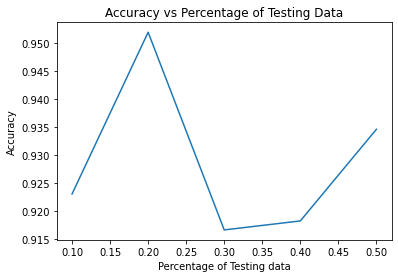

In [ ]:
import matplotlib.pyplot as plt
plt.plot(per,accuracy)
plt.xlabel("Percentage of Testing data")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Percentage of Testing Data")
plt.show()